In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
data = pd.read_csv('./cardata.csv')
pf = pd.read_csv('./cardata.csv')

In [3]:
data

,buying,maint,doors,persons,lug_Boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_Boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
#Converting data to integer format
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_Boot'],_ = pd.factorize(data['lug_Boot'])
data['safety'],_ = pd.factorize(data['safety'])
data['class'],class_names = pd.factorize(data['class'])

In [6]:
data

,buying,maint,doors,persons,lug_Boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
1723,3,3,3,2,1,1,3
1724,3,3,3,2,1,2,2
1725,3,3,3,2,2,0,0
1726,3,3,3,2,2,1,3


In [7]:
#Unique data values in the dataset:
for i in data.columns:
    print("Unique Columns: ",data[i].unique()," Number of Columns:  ", data[i].nunique())

Unique Columns:  [0 1 2 3]  Number of Columns:   4
Unique Columns:  [0 1 2 3]  Number of Columns:   4
Unique Columns:  [0 1 2 3]  Number of Columns:   4
Unique Columns:  [0 1 2]  Number of Columns:   3
Unique Columns:  [0 1 2]  Number of Columns:   3
Unique Columns:  [0 1 2]  Number of Columns:   3
Unique Columns:  [0 1 2 3]  Number of Columns:   4


3    432
2    432
1    432
0    432
Name: buying, dtype: int64

3    432
2    432
1    432
0    432
Name: maint, dtype: int64

3    432
2    432
1    432
0    432
Name: doors, dtype: int64

2    576
1    576
0    576
Name: persons, dtype: int64

2    576
1    576
0    576
Name: lug_Boot, dtype: int64

2    576
1    576
0    576
Name: safety, dtype: int64

0    1210
1     384
3      69
2      65
Name: class, dtype: int64



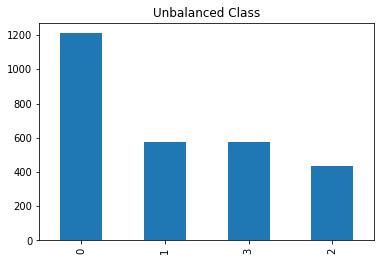

In [8]:
#Data Classification:
for i in data.columns:
    print(data[i].value_counts())
    data[i].value_counts().plot(kind='bar', title='Unbalanced Class');
    print()

3.0    1210
2.0    1210
1.0    1210
0.0    1210
Name: class, dtype: int64


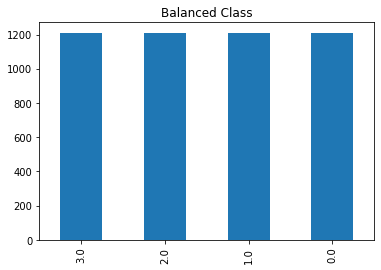

In [17]:
#Sampling(because data is not correctly balanced):
X = data[['buying','maint','doors','persons','lug_Boot','safety']]
Y = data['class']

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, Y_sm = smote.fit_sample(X, Y)
df_smote_over = pd.concat([pd.DataFrame(X_sm), pd.DataFrame(Y_sm, columns=['class'])])
print(df_smote_over['class'].value_counts())
df_smote_over['class'].value_counts().plot(kind='bar', title='Balanced Class')
plt.show()

In [10]:
# split data randomly into 70% training and 30% test
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.3)

In [11]:
clf=RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth = 5)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

In [12]:
count_misclassified = (Y_test != Y_pred).sum()
print("**** Random Forest *****")
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

**** Random Forest *****
Misclassified samples: 116
Accuracy: 0.92


In [13]:
feat_names = list(data.columns.values)[:-1]
print(feat_names)

['buying', 'maint', 'doors', 'persons', 'lug_Boot', 'safety']


In [14]:
import numpy as np
feat_importances = clf.feature_importances_
indices = np.argsort(feat_importances)[::-1]
names = [feat_names[i] for i in indices]
# Displaying the importances for each feature.
for name, imp in zip(feat_names, feat_importances):
    print("{}: {}".format(name, imp))

buying: 0.22560838752152748
maint: 0.16403669449376465
doors: 0.009143116107055267
persons: 0.16040327511022615
lug_Boot: 0.13093126803610936
safety: 0.3098772587313171


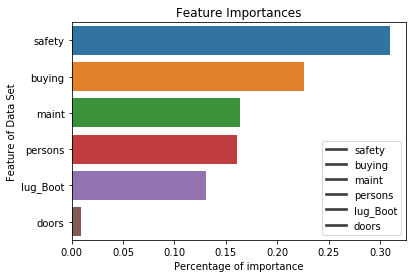

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Feature Importances')
plt.xlabel('Percentage of importance')
plt.ylabel('Feature of Data Set')
feat_imp_plot = sns.barplot(x=feat_importances[indices], y=names)
feat_imp_plot.legend(names, loc = "best")